## STUDENT PERFORMANCE INDICATOR


### Life cycle of machine learning project

-  Understanding the Problem Statement
-  Data Collection 
-  Data Checks to Perform
-  Exploatory Data Analysis
-  Data Preprocessing
-  Model Training
- Model selection


### 1)Problem Statement

- This project understands hoe students performance is affected by other variables such as parental level of education,Lunch, and test preparation course

### 2) Data Collection 

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows

#### 2.1 Import Data and Required Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


#### Import the CSV Data and Pandas Dataframe

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Data checks to perform 

- Check Missimg Values 
- Check Duplicates 
- Check Data Types 
- Check the Number of Unique Values of each Column
- Check the Statistics of Dataset
- Check Various Categories Present in Different categorical column

##### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in dataset

#### 3.3 Check  datatype

In [10]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### 3.4 Check Unique Values

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check Statistics of dataset 

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### insights 

- All means and std are close to each other
- minium score varies for math, reading, and writing score 

### Check Various Categories present in Dataset 

In [17]:
print("Categories in 'gender' column: ", end="")
print(df.gender.nunique())

print("Categories in 'race/ethnicity' column: ", end='')
print(df.race_ethnicity.nunique())

print("Categories in 'parental_level_of_education ' column: ", end="")
print(df.parental_level_of_education .nunique())

print("Categories in 'lunch' column: ", end="")
print(df.lunch.nunique())

print("Categories in 'test_preparation_course ' column: ", end="")
print(df.test_preparation_course .nunique())

Categories in 'gender' column: 2
Categories in 'race/ethnicity' column: 5
Categories in 'parental_level_of_education ' column: 6
Categories in 'lunch' column: 2
Categories in 'test_preparation_course ' column: 2


### 3.8 Adding Column for Total Score and Average

In [18]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score   
df['average_score'] = df.total_score / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()  
maths_full = df[df['math_score'] == 100]['average_score'].count()

print("Number of students who scored 100 in reading: ", reading_full)
print("Number of students who scored 100 in writing: ", writing_full)
print("Number of students who scored 100 in maths: ", maths_full)

Number of students who scored 100 in reading:  17
Number of students who scored 100 in writing:  14
Number of students who scored 100 in maths:  7


In [28]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()  
maths_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print("Number of students who scored less than 20 in reading: ", reading_less_20)
print("Number of students who scored less than 20 in writing: ", writing_less_20)
print("Number of students who scored less than 20 in maths: ", maths_less_20)

Number of students who scored less than 20 in reading:  1
Number of students who scored less than 20 in writing:  3
Number of students who scored less than 20 in maths:  4


#### Insights 

- Students have performed best in reading and worst in maths

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

- Histogram 
- Kernal Distribution Functions(KDE)

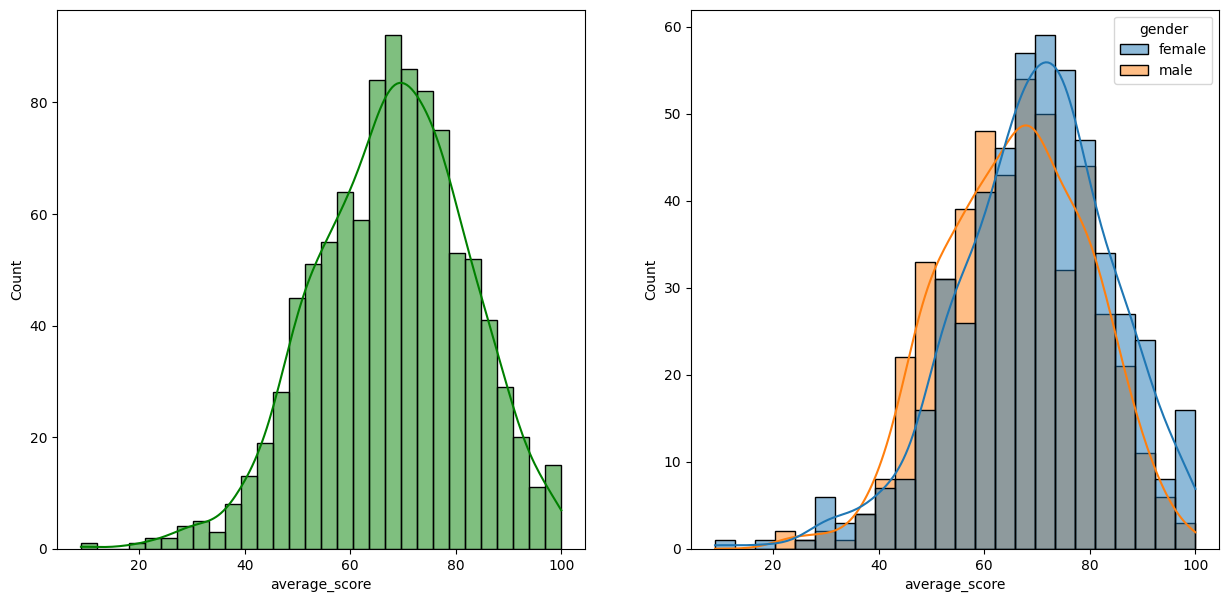

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', kde=True , bins=30, color='green')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True,  color='green', hue='gender')
plt.show()

#### insights 

- Majority of the students have scored between 60 to 80
- female students have higher average score than male students

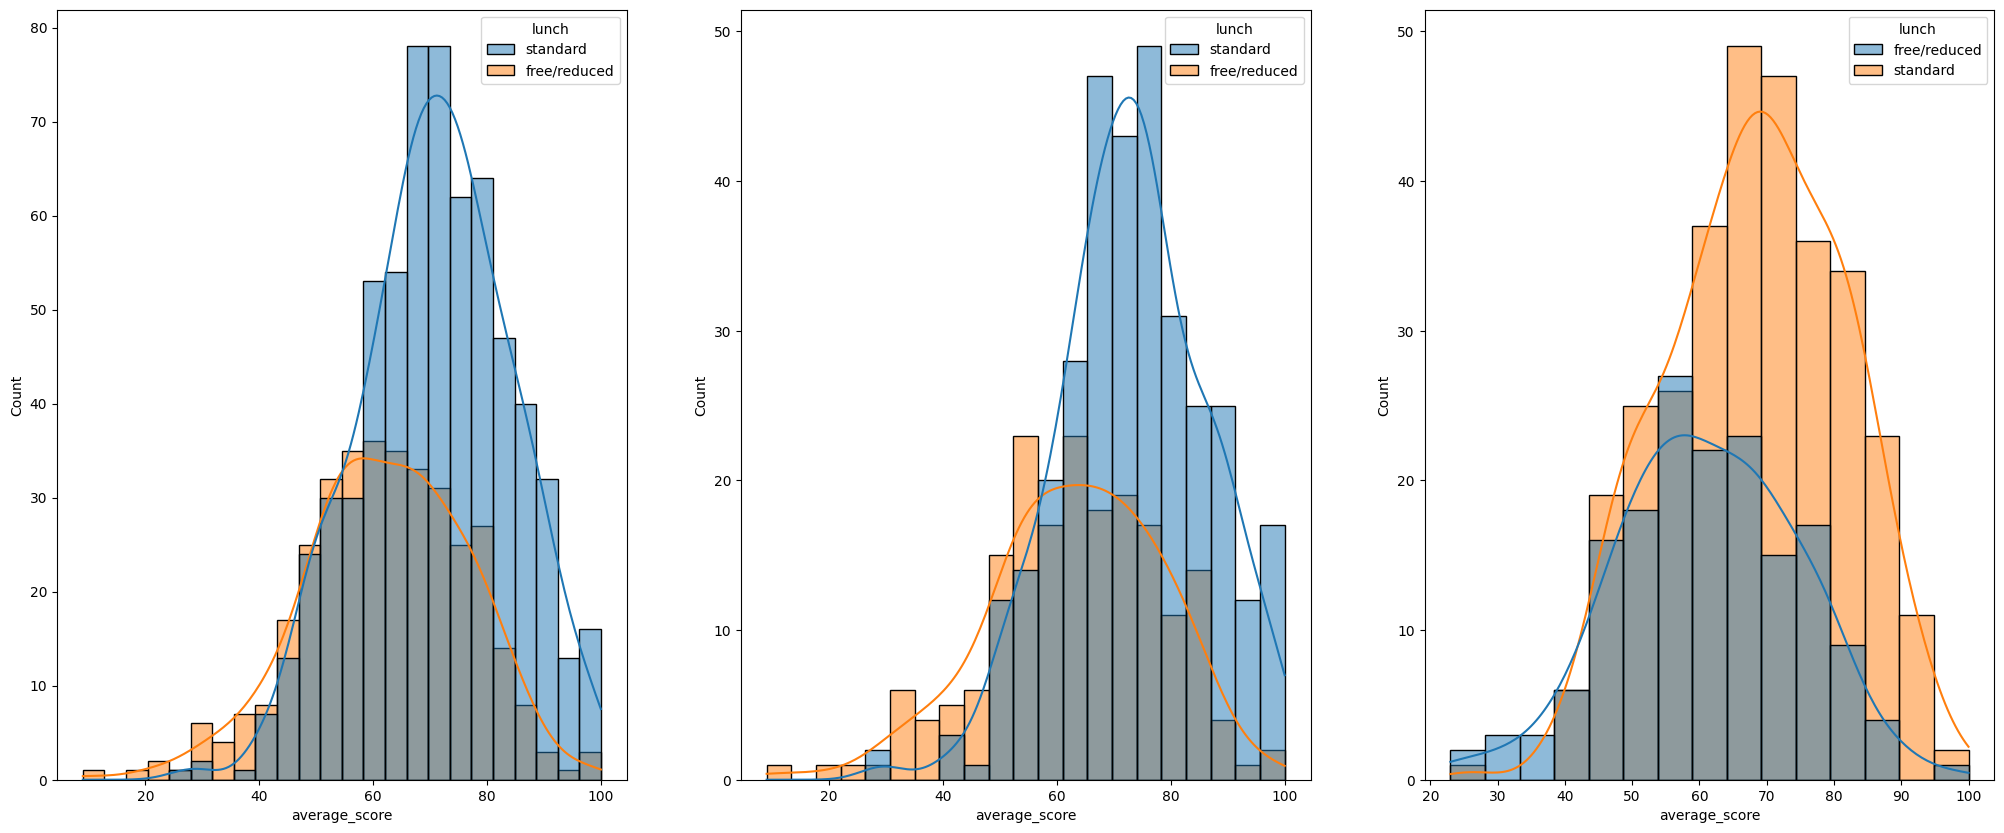

In [38]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()


#### Insights 

standard lunch tends to have higher score be it male or female